# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (18)

**30/01/2023**

## Aplicar un caso de uso (*Clasificación*)

In [2]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

### Dataset de cubierta forestal

**[Forest Covertype data](https://archive.ics.uci.edu/ml/datasets/Covertype)** es un conjunto de datos cargado en la librería _sklearn_ que permite realizar un ejercicio tipo problemas de **clasificación**. El objetivo de este dataset es **estudiar las variables cartográficas** para poder **predecir el tipo de cubierta forestal**. El tipo real de cubierta forestal para una observación (celda de 30 x 30 metros) se ha determinado a partir de los datos del **Servicio Forestal de EE.UU. (USFS)**. 

Los datos están en forma **cruda** (sin escalar) y contienen columnas binarias (0 o 1) de datos para variables independientes cualitativas (áreas silvestres y tipos de suelo).

Estas áreas de estudio representan **bosques con mínimas perturbaciones causadas por el hombre**, por lo que los tipos de cubierta forestal existentes son más el **resultado de procesos ecológicos**, que de prácticas de gestión forestal.

### Análisis Exploratorio Inicial, Tratamiento y Limpieza de datos

In [4]:
from sklearn.datasets import fetch_covtype

# Construimos un dataframe con los datos medidos de la cubierta forestal
dataset_cub = pd.DataFrame(fetch_covtype()["data"], columns=fetch_covtype()["feature_names"])

# Añadimos la variable objetivo
dataset_cub['target'] = fetch_covtype()["target"]

dataset_cub

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2596.0    51.0    3.0                             258.0   
1          2590.0    56.0    2.0                             212.0   
2          2804.0   139.0    9.0                             268.0   
3          2785.0   155.0   18.0                             242.0   
4          2595.0    45.0    2.0                             153.0   
...           ...     ...    ...                               ...   
581007     2396.0   153.0   20.0                              85.0   
581008     2391.0   152.0   19.0                              67.0   
581009     2386.0   159.0   17.0                              60.0   
581010     2384.0   170.0   15.0                              60.0   
581011     2383.0   165.0   13.0                              60.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                  0.0                            510.0   
1                                 -6.0                            390.0   
2                                 65.0                           3180.0   
3                                118.0                           3090.0   
4                                 -1.0                            391.0   
...                                ...                              ...   
581007                            17.0                            108.0   
581008                            12.0                             95.0   
581009                             7.0                             90.0   
581010                             5.0                             90.0   
581011                             4.0                             67.0   

        Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0               221.0           232.0          148.0   
1               220.0           235.0          151.0   
2               234.0           238.0          135.0   
3               238.0           238.0          122.0   
4               220.0           234.0          150.0   
...               ...             ...            ...   
581007          240.0           237.0          118.0   
581008          240.0           237.0          119.0   
581009          236.0           241.0          130.0   
581010          230.0           245.0          143.0   
581011          231.0           244.0          141.0   

        Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                   6279.0  ...           0.0           0.0   
1                                   6225.0  ...           0.0           0.0   
2                                   6121.0  ...           0.0           0.0   
3                                   6211.0  ...           0.0           0.0   
4                                   6172.0  ...           0.0           0.0   
...                                    ...  ...           ...           ...   
581007                               837.0  ...           0.0           0.0   
581008                               845.0  ...           0.0           0.0   
581009                               854.0  ...           0.0           0.0   
581010                               864.0  ...           0.0           0.0   
581011                               875.0  ...           0.0           0.0   

        Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0                0.0           0.0           0.0           0.0           0.0   
1                0.0           0.0           0.0           0.0           0.0   
2                0.0           0.0           0.0           0.0           0.0   
3                0.0           0.0           0.0           0.0           0.0   
4                0.0           0.0           0.0           0.0           0.0   
...              ...           ...           ...           ...           ...   
581007           0.0           0.0           0.0           0.0           0.0   
5810

Vamos a sacar un dataset mucho más pequeño para **simplificar los cálculos** y **reducir el tiempo de computación** de los algoritmos. Una primera idea para extraer un subconjunto podría ser quedarnos por ejemplo con los **_100.000_ primeros registros** de la tabla.

In [5]:
dataset_cub[0:100000]

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         2596.0    51.0    3.0                             258.0   
1         2590.0    56.0    2.0                             212.0   
2         2804.0   139.0    9.0                             268.0   
3         2785.0   155.0   18.0                             242.0   
4         2595.0    45.0    2.0                             153.0   
...          ...     ...    ...                               ...   
99995     3100.0    52.0   16.0                             376.0   
99996     3090.0    50.0   16.0                             361.0   
99997     3083.0    45.0   18.0                             335.0   
99998     3077.0    41.0   15.0                             309.0   
99999     3073.0    50.0   12.0                             283.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 0.0                            510.0   
1                                -6.0                            390.0   
2                                65.0                           3180.0   
3                               118.0                           3090.0   
4                                -1.0                            391.0   
...                               ...                              ...   
99995                            50.0                           3816.0   
99996                            40.0                           3840.0   
99997                            33.0                           3864.0   
99998                            43.0                           3889.0   
99999                            52.0                           3913.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              221.0           232.0          148.0   
1              220.0           235.0          151.0   
2              234.0           238.0          135.0   
3              238.0           238.0          122.0   
4              220.0           234.0          150.0   
...              ...             ...            ...   
99995          227.0           203.0          105.0   
99996          225.0           202.0          106.0   
99997          222.0           198.0          104.0   
99998          221.0           205.0          116.0   
99999          225.0           214.0          121.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  6279.0  ...           0.0           0.0   
1                                  6225.0  ...           0.0           0.0   
2                                  6121.0  ...           0.0           0.0   
3                                  6211.0  ...           0.0           0.0   
4                                  6172.0  ...           0.0           0.0   
...                                   ...  ...           ...           ...   
99995                              4295.0  ...           0.0           0.0   
99996                              4268.0  ...           0.0           0.0   
99997                              4241.0  ...           0.0           0.0   
99998                              4214.0  ...           0.0           0.0   
99999                              4187.0  ...           0.0           0.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

El posible peligro de este enfoque es que **no obtengamos un subconjunto muy representativo**. Realizamos una consulta sobre una de las variables del datset para ver si estadísticamente tienen las mismas características o no. 

In [6]:
dataset_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    581012.000000
mean       2959.365301
std         279.984734
Name: Elevation, dtype: float64

In [7]:
dataset_cub[0:100000]['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2862.036680
std         231.376584
Name: Elevation, dtype: float64

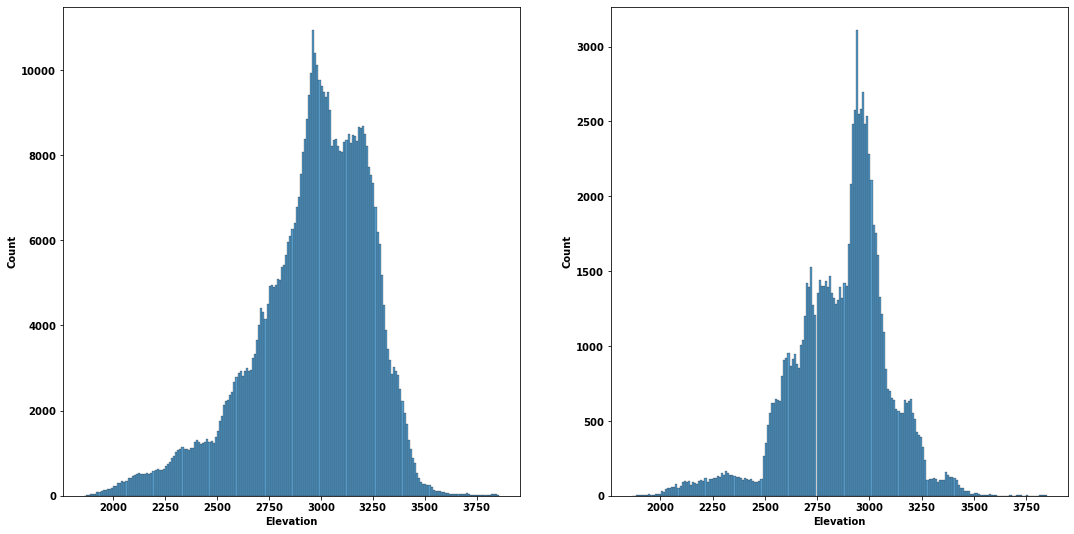

In [8]:
# Comparar la distribución de la variable "Elevation" entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(dataset_cub[0:100000]['Elevation'], bins=200, ax=axes[1])
plt.show()

Se puede observar que la variable analizada no tiene la misma representación en el subconjunto de los _100.000_ primeros registros del dataset. Otra opción para conseguir un trozo de los datos originales, sería aplicar la técnica de **remuestro aleatorio (_random resampling_)**.

Vamos a hacer un remuestreo aleatorio para **quedarnos aproximadamente con el 17% de los datos** usando el método **[sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)** sobre los _DataFrames_ de la librería _pandas_:

In [9]:
100/6

16.666666666666668

In [10]:
df_cub = dataset_cub.sample(frac=1/5.81012, random_state=222).reset_index(drop=True)
df_cub

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3311.0     3.0   13.0                             551.0   
1         2429.0    70.0   29.0                              95.0   
2         2324.0   315.0   14.0                             124.0   
3         2959.0   346.0   10.0                              90.0   
4         2910.0    62.0   15.0                             330.0   
...          ...     ...    ...                               ...   
99995     2908.0    59.0   15.0                             633.0   
99996     2379.0   292.0   21.0                              95.0   
99997     2786.0   147.0    7.0                              42.0   
99998     2863.0    36.0   10.0                             514.0   
99999     2970.0    63.0   23.0                             495.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               106.0                           2780.0   
1                                18.0                           1589.0   
2                                43.0                            391.0   
3                                20.0                           5876.0   
4                                97.0                           3246.0   
...                               ...                              ...   
99995                           271.0                           1036.0   
99996                            37.0                           1321.0   
99997                             7.0                           2162.0   
99998                            26.0                           2746.0   
99999                           182.0                           2006.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              202.0           215.0          149.0   
1              237.0           169.0           43.0   
2              182.0           228.0          185.0   
3              200.0           223.0          162.0   
4              231.0           208.0          106.0   
...              ...             ...            ...   
99995          230.0           208.0          107.0   
99996          155.0           230.0          213.0   
99997          229.0           239.0          143.0   
99998          219.0           217.0          132.0   
99999          233.0           185.0           71.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  2220.0  ...           0.0           0.0   
1                                   391.0  ...           0.0           0.0   
2                                   560.0  ...           0.0           0.0   
3                                  3979.0  ...           0.0           0.0   
4                                  2275.0  ...           1.0           0.0   
...                                   ...  ...           ...           ...   
99995                               577.0  ...           0.0           1.0   
99996                               330.0  ...           0.0           0.0   
99997                              1574.0  ...           0.0           0.0   
99998                              3550.0  ...           0.0           0.0   
99999                              2171.0  ...           0.0           1.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           1.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

In [11]:
# Consultamos las principales esdadísticas de la variable analizada anteriormente
df_cub['Elevation'].describe()[['count', 'mean', 'std']]

count    100000.000000
mean       2959.010060
std         279.864034
Name: Elevation, dtype: float64

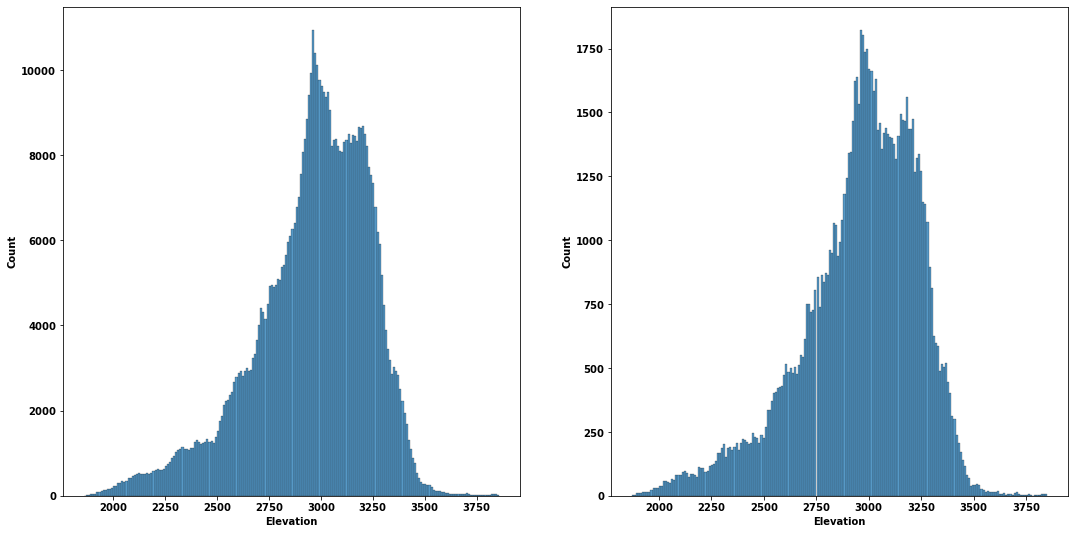

In [12]:
# Comparar la distribución de la variable "Elevation" entre el DataFrame original y el subconjunto obtenido mediante el remuestreo aleatorio
fig, axes = plt.subplots(1, 2, figsize=(18,9))
sns.histplot(dataset_cub['Elevation'], bins=200, ax=axes[0])
sns.histplot(df_cub['Elevation'], bins=200, ax=axes[1])
plt.show()

Podemos ver que este último subconjunto, a pesar de tener solamente 17% de los datos, **sí que incluye un set de observaciones muy representativas** respecto al dataset original. 

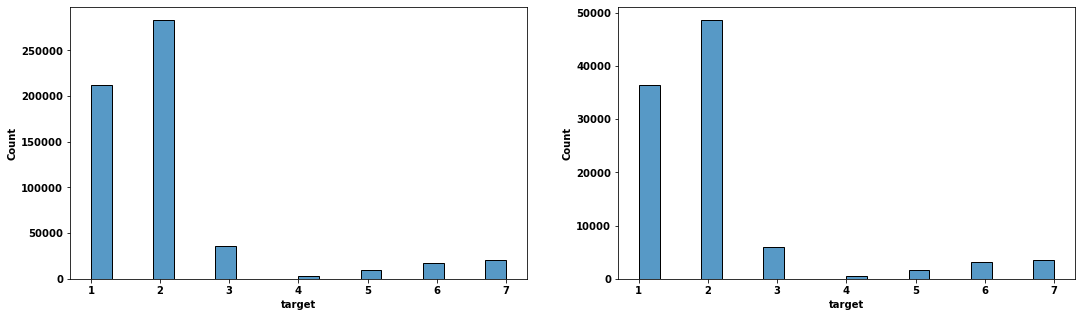

In [13]:
# Comparar la distribución de la variable objetivo entre los dos Dataframes
fig, axes = plt.subplots(1, 2, figsize=(18,5))
sns.histplot(dataset_cub['target'], bins=20, ax=axes[0])
sns.histplot(df_cub['target'], bins=20, ax=axes[1])
plt.show()

In [14]:
df_cub.describe()

Elevation         Aspect          Slope  \
count  100000.000000  100000.000000  100000.000000   
mean     2959.010060     155.927130      14.078440   
std       279.864034     111.880189       7.466349   
min      1871.000000       0.000000       0.000000   
25%      2810.000000      59.000000       9.000000   
50%      2995.000000     127.000000      13.000000   
75%      3163.000000     261.000000      18.000000   
max      3849.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     100000.000000                   100000.000000   
mean                         268.415310                       45.890660   
std                          212.389266                       57.923415   
min                            0.000000                     -164.000000   
25%                          108.000000                        7.000000   
50%                          218.000000                       29.000000   
75%                          384.000000                       68.000000   
max                         1390.000000                      592.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    100000.000000  100000.000000   100000.000000   
mean                       2356.444880     212.226180      223.392060   
std                        1559.881883      26.567206       19.768911   
min                           0.000000       0.000000        0.000000   
25%                        1110.000000     198.000000      213.000000   
50%                        2005.000000     218.000000      226.000000   
75%                        3336.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type_31  \
count  100000.000000                       100000.000000  ...  100000.000000   
mean      142.541110                         1984.702670  ...       0.091120   
std        38.116316                         1328.355754  ...       0.287781   
min         0.000000                            0.000000  ...       0.000000   
25%       119.000000                         1022.000000  ...       0.000000   
50%       143.000000                         1712.000000  ...       0.000000   
75%       168.000000                         2553.000000  ...       0.000000   
max       253.000000                         7168.000000  ...       1.000000   

        Soil_Type_32   Soil_Type_33   Soil_Type_34   Soil_Type_35  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.078660       0.003050       0.003510       0.000190   
std         0.269209       0.055143       0.059141       0.013783   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

        Soil_Type_36   Soil_Type_37   Soil_Type_38   Soil_Type_39  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.000510       0.026360       0.023650       0.014600   
std         0.022578       0.160204       0.151957       0.119946   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

             target  
count  100000.00000  
mean        2.05919  
std         1.40864  
min         1.00000  
25%         1.00000  
50%         2.00000  
75%         2.00000  
max         7.00000  

[8 rows x 55 columns]

In [15]:
df_cub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

In [16]:
# Conteo de valores perdidos/faltantes  
df_cub.isna().sum().sum()

0

In [17]:
# Consultamos los registros que tienen algún valor nulo
df_cub.drop(df_cub.dropna().index)

Empty DataFrame
Columns: [Elevation, Aspect, Slope, Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology, Horizontal_Distance_To_Roadways, Hillshade_9am, Hillshade_Noon, Hillshade_3pm, Horizontal_Distance_To_Fire_Points, Wilderness_Area_0, Wilderness_Area_1, Wilderness_Area_2, Wilderness_Area_3, Soil_Type_0, Soil_Type_1, Soil_Type_2, Soil_Type_3, Soil_Type_4, Soil_Type_5, Soil_Type_6, Soil_Type_7, Soil_Type_8, Soil_Type_9, Soil_Type_10, Soil_Type_11, Soil_Type_12, Soil_Type_13, Soil_Type_14, Soil_Type_15, Soil_Type_16, Soil_Type_17, Soil_Type_18, Soil_Type_19, Soil_Type_20, Soil_Type_21, Soil_Type_22, Soil_Type_23, Soil_Type_24, Soil_Type_25, Soil_Type_26, Soil_Type_27, Soil_Type_28, Soil_Type_29, Soil_Type_30, Soil_Type_31, Soil_Type_32, Soil_Type_33, Soil_Type_34, Soil_Type_35, Soil_Type_36, Soil_Type_37, Soil_Type_38, Soil_Type_39, target]
Index: []

[0 rows x 55 columns]

### Reducción de Variables (___Dimensionality Reduction___)

### **`Ejercicio 18.1`**

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de **Selección de variables basada en árbol de decisión** mediante las importancias de cada variable (**`Decision Trees Importances`**):

- Filtra el tablón para quedarnos solamente con **las variables que aglutinan hasta el `95%` de la información** que se requiere para estimar la variable objetivo.
- `random_state=100`

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.datasets import fetch_covtype

# Se establece el dataset como df_cub que es igual de representativo que el dataset original, pero con muchos menos datos lo que agiliza el proceso computacional significativamente
dataset_1 = df_cub

dataset_1

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0         3311.0     3.0   13.0                             551.0   
1         2429.0    70.0   29.0                              95.0   
2         2324.0   315.0   14.0                             124.0   
3         2959.0   346.0   10.0                              90.0   
4         2910.0    62.0   15.0                             330.0   
...          ...     ...    ...                               ...   
99995     2908.0    59.0   15.0                             633.0   
99996     2379.0   292.0   21.0                              95.0   
99997     2786.0   147.0    7.0                              42.0   
99998     2863.0    36.0   10.0                             514.0   
99999     2970.0    63.0   23.0                             495.0   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               106.0                           2780.0   
1                                18.0                           1589.0   
2                                43.0                            391.0   
3                                20.0                           5876.0   
4                                97.0                           3246.0   
...                               ...                              ...   
99995                           271.0                           1036.0   
99996                            37.0                           1321.0   
99997                             7.0                           2162.0   
99998                            26.0                           2746.0   
99999                           182.0                           2006.0   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0              202.0           215.0          149.0   
1              237.0           169.0           43.0   
2              182.0           228.0          185.0   
3              200.0           223.0          162.0   
4              231.0           208.0          106.0   
...              ...             ...            ...   
99995          230.0           208.0          107.0   
99996          155.0           230.0          213.0   
99997          229.0           239.0          143.0   
99998          219.0           217.0          132.0   
99999          233.0           185.0           71.0   

       Horizontal_Distance_To_Fire_Points  ...  Soil_Type_31  Soil_Type_32  \
0                                  2220.0  ...           0.0           0.0   
1                                   391.0  ...           0.0           0.0   
2                                   560.0  ...           0.0           0.0   
3                                  3979.0  ...           0.0           0.0   
4                                  2275.0  ...           1.0           0.0   
...                                   ...  ...           ...           ...   
99995                               577.0  ...           0.0           1.0   
99996                               330.0  ...           0.0           0.0   
99997                              1574.0  ...           0.0           0.0   
99998                              3550.0  ...           0.0           0.0   
99999                              2171.0  ...           0.0           1.0   

       Soil_Type_33  Soil_Type_34  Soil_Type_35  Soil_Type_36  Soil_Type_37  \
0               0.0           0.0           0.0           0.0           1.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               0.0           0.0           0.0           0.0           0.0   
4               0.0           0.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
99995           0.0           0.0           0.0           0.0           0.0   
99996           0.0           0.0           0.0           0

---

In [20]:
X = dataset_1.drop('target', axis=1)  # Elimina la columna de la variable objetivo del conjunto de características
y = dataset_1['target']  # Obtiene la variable objetivo


Divide los datos en características (variables independientes) y la variable objetivo

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [22]:
rf = RandomForestRegressor(random_state=100)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=100)

In [23]:
importances = rf.feature_importances_


In [24]:
sorted_indices = importances.argsort()[::-1]


In [25]:
importances_cumulative = np.cumsum(importances[sorted_indices])


In [26]:
selected_indices = np.where(importances_cumulative >= 0.95)[0][0] + 1


In [27]:
selected_features = X.columns[sorted_indices[:selected_indices]]
filtered_data = dataset_1[selected_features]


In [28]:
filtered_data

Elevation  Horizontal_Distance_To_Fire_Points  \
0         3311.0                              2220.0   
1         2429.0                               391.0   
2         2324.0                               560.0   
3         2959.0                              3979.0   
4         2910.0                              2275.0   
...          ...                                 ...   
99995     2908.0                               577.0   
99996     2379.0                               330.0   
99997     2786.0                              1574.0   
99998     2863.0                              3550.0   
99999     2970.0                              2171.0   

       Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                               2780.0                             551.0   
1                               1589.0                              95.0   
2                                391.0                             124.0   
3                               5876.0                              90.0   
4                               3246.0                             330.0   
...                                ...                               ...   
99995                           1036.0                             633.0   
99996                           1321.0                              95.0   
99997                           2162.0                              42.0   
99998                           2746.0                             514.0   
99999                           2006.0                             495.0   

       Vertical_Distance_To_Hydrology  Wilderness_Area_2  Aspect  \
0                               106.0                1.0     3.0   
1                                18.0                1.0    70.0   
2                                43.0                0.0   315.0   
3                                20.0                0.0   346.0   
4                                97.0                1.0    62.0   
...                               ...                ...     ...   
99995                           271.0                1.0    59.0   
99996                            37.0                0.0   292.0   
99997                             7.0                0.0   147.0   
99998                            26.0                0.0    36.0   
99999                           182.0                1.0    63.0   

       Soil_Type_31  Hillshade_Noon  Hillshade_9am  Hillshade_3pm  Slope  \
0               0.0           215.0          202.0          149.0   13.0   
1               0.0           169.0          237.0           43.0   29.0   
2               0.0           228.0          182.0          185.0   14.0   
3               0.0           223.0          200.0          162.0   10.0   
4               1.0           208.0          231.0          106.0   15.0   
...             ...             ...            ...            ...    ...   
99995           0.0           208.0          230.0          107.0   15.0   
99996           0.0           230.0          155.0          213.0   21.0   
99997           0.0           239.0          229.0          143.0    7.0   
99998           0.0           217.0          219.0          132.0   10.0   
99999           0.0           185.0          233.0           71.0   23.0   

       Wilderness_Area_0  Soil_Type_38  Soil_Type_34  Soil_Type_37  \
0                    0.0           0.0           0.0           1.0   
1                    0.0           0.0           0.0           0.0   
2                    0.0           0.0           0.0           0.0   
3                    1.0           0.0           0.0           0.0   
4                    0.0           0.0           0.0           0.0   
...                  ...           ...           ...           ...   
99995                0.0           0.0           0.0           0.0   
99996                0.0           0.0           0.0           0.0   
99997                1.0           0.0           0.0         

In [31]:
df_cub.info()
filtered_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           100000 non-null  float64
 1   Aspect                              100000 non-null  float64
 2   Slope                               100000 non-null  float64
 3   Horizontal_Distance_To_Hydrology    100000 non-null  float64
 4   Vertical_Distance_To_Hydrology      100000 non-null  float64
 5   Horizontal_Distance_To_Roadways     100000 non-null  float64
 6   Hillshade_9am                       100000 non-null  float64
 7   Hillshade_Noon                      100000 non-null  float64
 8   Hillshade_3pm                       100000 non-null  float64
 9   Horizontal_Distance_To_Fire_Points  100000 non-null  float64
 10  Wilderness_Area_0                   100000 non-null  float64
 11  Wilderness_Area_1          

Como se puede observar se han reducido sustancialmente el numero de variables

### **`Ejercicio 18.2`**

Después de filtrar el dataset vamos a plantear un **problema de clasificación** para conseguir un **clasificador de la cubierta forestal** en basea a las **variables cartográficas**.:  

**`18.2.1`** Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.  

**`18.2.2`** Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de `0` a `1`
- Convertir la variable objetivo en valores numéricos **entre 0 y el número de clases menos 1**

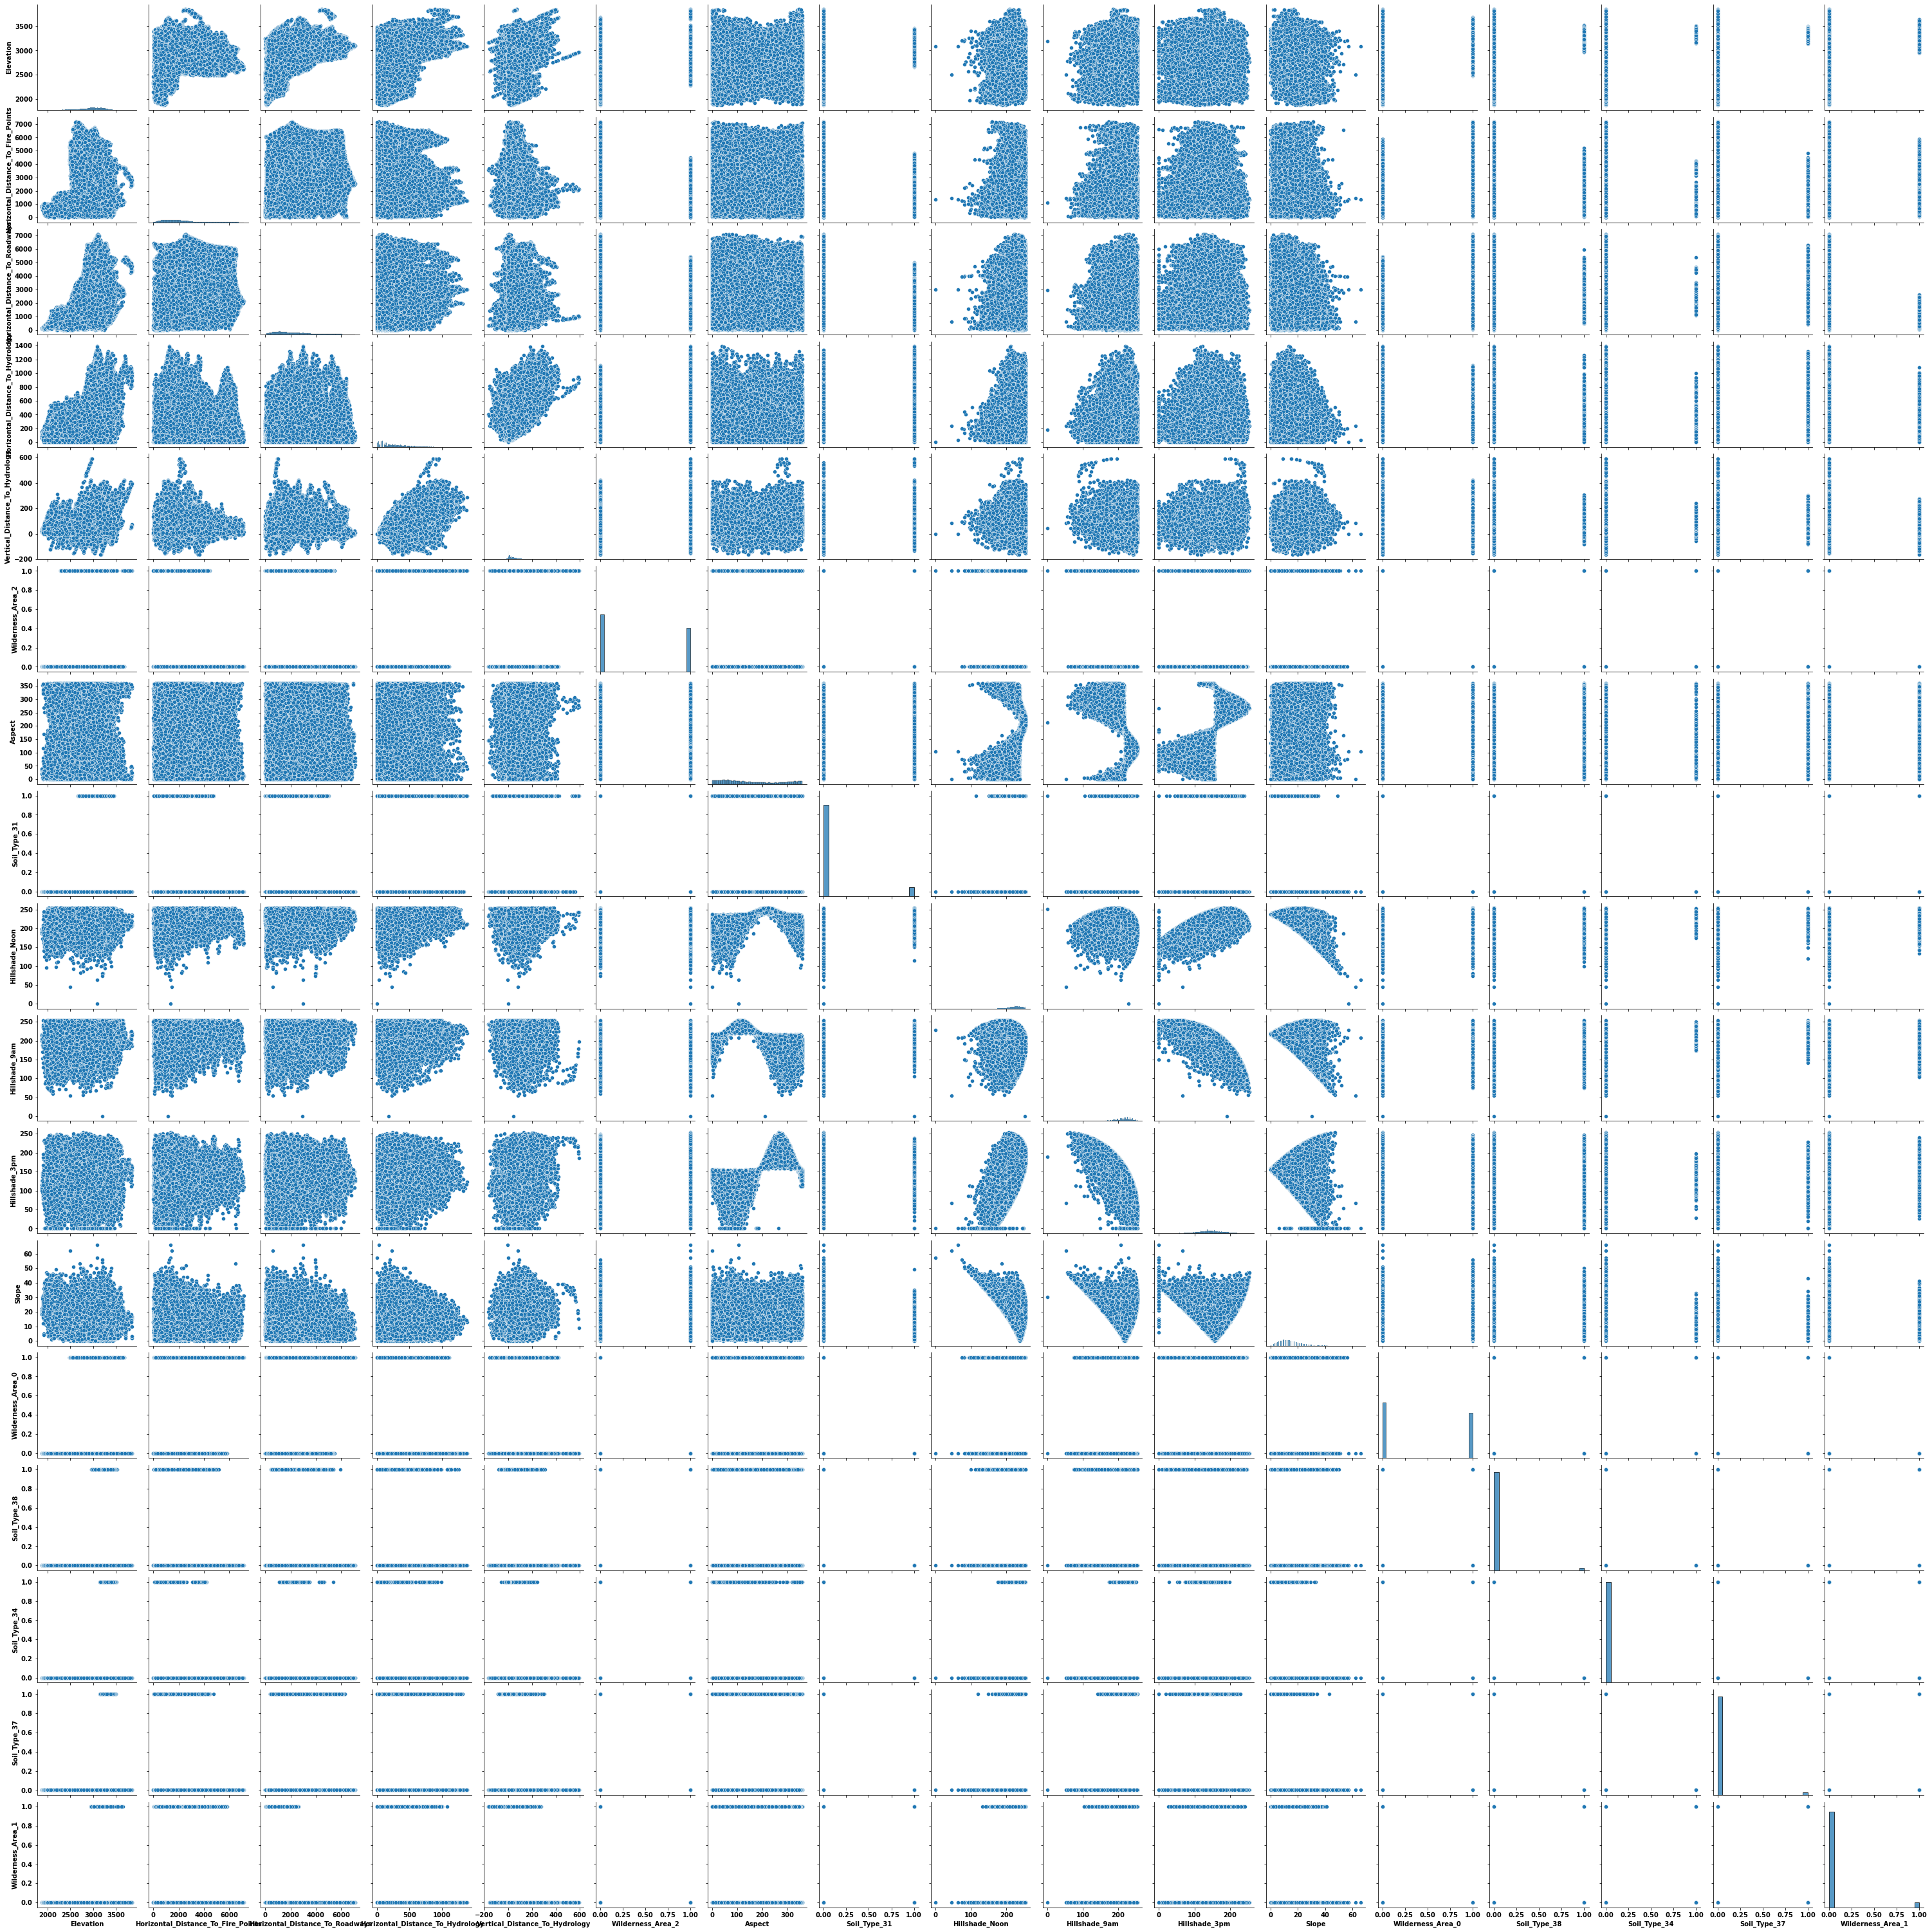

In [32]:
sns.pairplot(filtered_data)
plt.show()

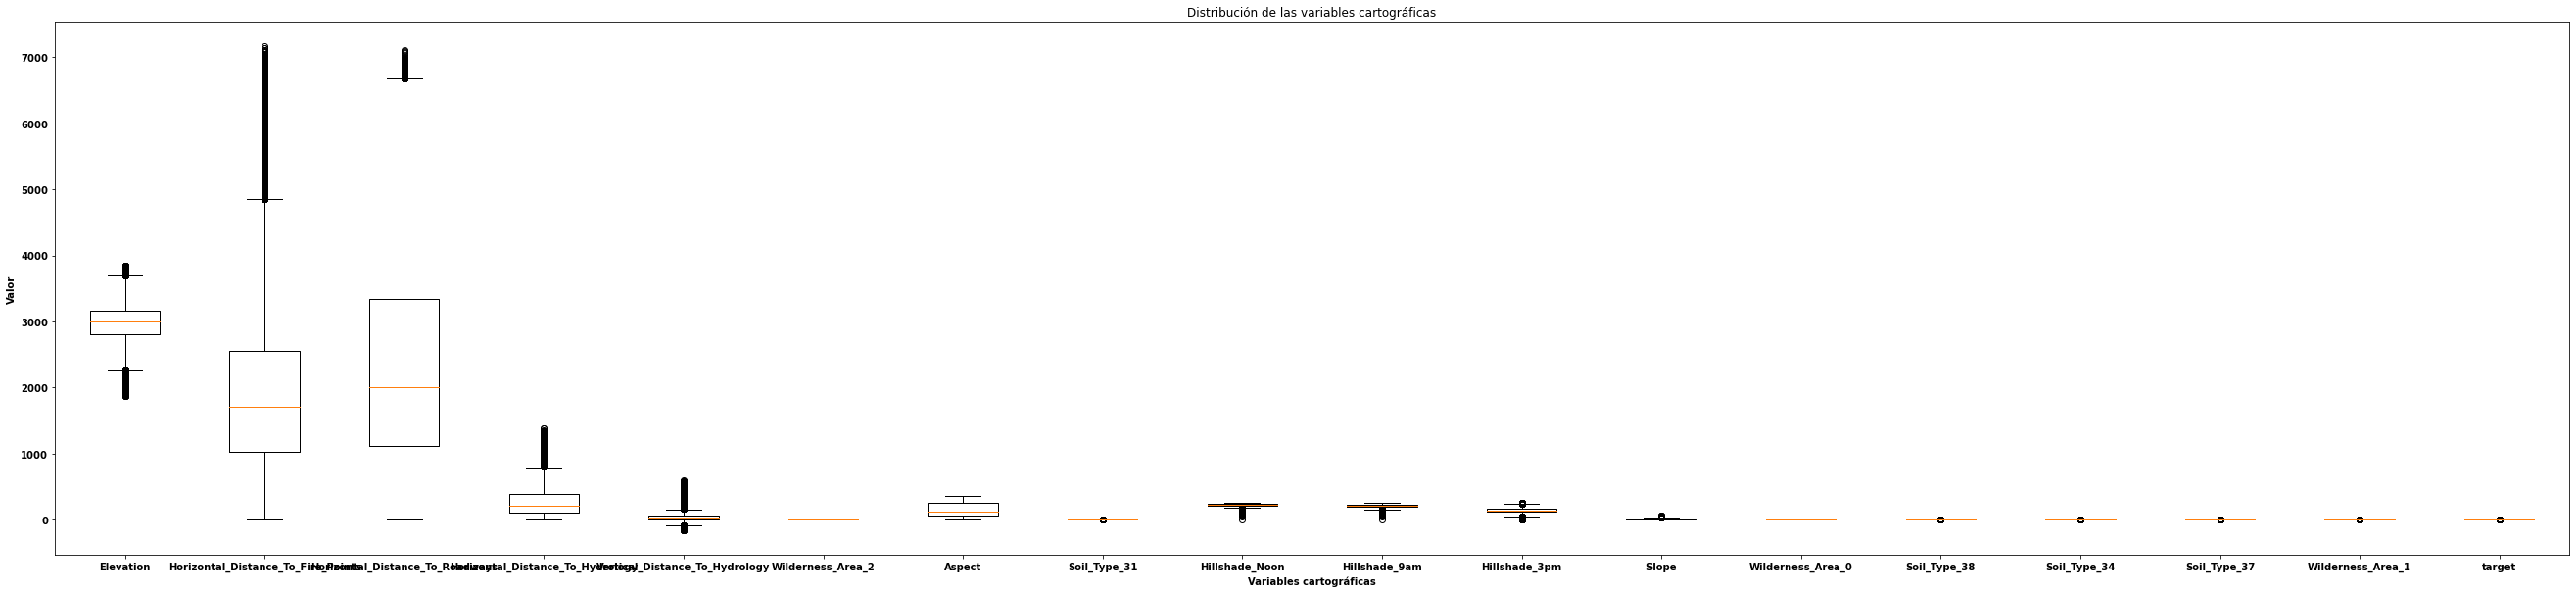

In [96]:
# Genera el gráfico de caja y bigotes
plt.figure(figsize=(46, 10))
plt.boxplot(filtered_data.values, labels=filtered_data.columns)
plt.title('Distribución de las variables cartográficas')
plt.xlabel('Variables cartográficas')
plt.ylabel('Valor')
plt.show()

Como se puede observar en los siguientes graficos se considera necesario normalizar los datos

In [35]:
from sklearn.preprocessing import StandardScaler

# Supongamos que tienes un DataFrame llamado "data" con las variables a normalizar

# Crea un objeto StandardScaler
scaler = StandardScaler()

# Aplica la estandarización a todas las variables del DataFrame
normalized_data = scaler.fit_transform(filtered_data)
filtered_data


Elevation  Horizontal_Distance_To_Fire_Points  \
0         3311.0                              2220.0   
1         2429.0                               391.0   
2         2324.0                               560.0   
3         2959.0                              3979.0   
4         2910.0                              2275.0   
...          ...                                 ...   
99995     2908.0                               577.0   
99996     2379.0                               330.0   
99997     2786.0                              1574.0   
99998     2863.0                              3550.0   
99999     2970.0                              2171.0   

       Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                               2780.0                             551.0   
1                               1589.0                              95.0   
2                                391.0                             124.0   
3                               5876.0                              90.0   
4                               3246.0                             330.0   
...                                ...                               ...   
99995                           1036.0                             633.0   
99996                           1321.0                              95.0   
99997                           2162.0                              42.0   
99998                           2746.0                             514.0   
99999                           2006.0                             495.0   

       Vertical_Distance_To_Hydrology  Wilderness_Area_2  Aspect  \
0                               106.0                1.0     3.0   
1                                18.0                1.0    70.0   
2                                43.0                0.0   315.0   
3                                20.0                0.0   346.0   
4                                97.0                1.0    62.0   
...                               ...                ...     ...   
99995                           271.0                1.0    59.0   
99996                            37.0                0.0   292.0   
99997                             7.0                0.0   147.0   
99998                            26.0                0.0    36.0   
99999                           182.0                1.0    63.0   

       Soil_Type_31  Hillshade_Noon  Hillshade_9am  Hillshade_3pm  Slope  \
0               0.0           215.0          202.0          149.0   13.0   
1               0.0           169.0          237.0           43.0   29.0   
2               0.0           228.0          182.0          185.0   14.0   
3               0.0           223.0          200.0          162.0   10.0   
4               1.0           208.0          231.0          106.0   15.0   
...             ...             ...            ...            ...    ...   
99995           0.0           208.0          230.0          107.0   15.0   
99996           0.0           230.0          155.0          213.0   21.0   
99997           0.0           239.0          229.0          143.0    7.0   
99998           0.0           217.0          219.0          132.0   10.0   
99999           0.0           185.0          233.0           71.0   23.0   

       Wilderness_Area_0  Soil_Type_38  Soil_Type_34  Soil_Type_37  \
0                    0.0           0.0           0.0           1.0   
1                    0.0           0.0           0.0           0.0   
2                    0.0           0.0           0.0           0.0   
3                    1.0           0.0           0.0           0.0   
4                    0.0           0.0           0.0           0.0   
...                  ...           ...           ...           ...   
99995                0.0           0.0           0.0           0.0   
99996                0.0           0.0           0.0           0.0   
99997                1.0           0.0           0.0         

In [108]:
todas_las_columnas[:-1]

['Elevation',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area_2',
 'Aspect',
 'Soil_Type_31',
 'Hillshade_Noon',
 'Hillshade_9am',
 'Hillshade_3pm',
 'Slope',
 'Wilderness_Area_0',
 'Soil_Type_38',
 'Soil_Type_34',
 'Soil_Type_37',
 'Wilderness_Area_1']

In [110]:
from sklearn.preprocessing import MinMaxScaler

# Crea una instancia del escalador MinMaxScaler
scaler = MinMaxScaler()

# Ajusta el escalador en función de los datos de entrenamiento
scaler.fit(filtered_data)

# Transforma los datos de entrada utilizando el escalador
df_entrada_scaled = scaler.transform(filtered_data)

# Crea un nuevo DataFrame con los datos de entrada escalados
df_entrada_scaled = pd.DataFrame(df_entrada_scaled, columns=todas_las_columnas)

# Ahora df_entrada_scaled contiene las variables de entrada escaladas en el rango de 0 a 1
df_entrada_scaled

Elevation  Horizontal_Distance_To_Fire_Points  \
0       0.728008                            0.309710   
1       0.282103                            0.054548   
2       0.229019                            0.078125   
3       0.550051                            0.555106   
4       0.525278                            0.317383   
...          ...                                 ...   
99995   0.524267                            0.080497   
99996   0.256825                            0.046038   
99997   0.462588                            0.219587   
99998   0.501517                            0.495257   
99999   0.555612                            0.302874   

       Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                             0.390614                          0.396403   
1                             0.223268                          0.068345   
2                             0.054939                          0.089209   
3                             0.825629                          0.064748   
4                             0.456091                          0.237410   
...                                ...                               ...   
99995                         0.145567                          0.455396   
99996                         0.185612                          0.068345   
99997                         0.303780                          0.030216   
99998                         0.385837                          0.369784   
99999                         0.281860                          0.356115   

       Vertical_Distance_To_Hydrology  Wilderness_Area_2    Aspect  \
0                            0.357143                1.0  0.008333   
1                            0.240741                1.0  0.194444   
2                            0.273810                0.0  0.875000   
3                            0.243386                0.0  0.961111   
4                            0.345238                1.0  0.172222   
...                               ...                ...       ...   
99995                        0.575397                1.0  0.163889   
99996                        0.265873                0.0  0.811111   
99997                        0.226190                0.0  0.408333   
99998                        0.251323                0.0  0.100000   
99999                        0.457672                1.0  0.175000   

       Soil_Type_31  Hillshade_Noon  Hillshade_9am  Hillshade_3pm     Slope  \
0               0.0        0.846457       0.795276       0.588933  0.196970   
1               0.0        0.665354       0.933071       0.169960  0.439394   
2               0.0        0.897638       0.716535       0.731225  0.212121   
3               0.0        0.877953       0.787402       0.640316  0.151515   
4               1.0        0.818898       0.909449       0.418972  0.227273   
...             ...             ...            ...            ...       ...   
99995           0.0        0.818898       0.905512       0.422925  0.227273   
99996           0.0        0.905512       0.610236       0.841897  0.318182   
99997           0.0        0.940945       0.901575       0.565217  0.106061   
99998           0.0        0.854331       0.862205       0.521739  0.151515   
99999           0.0        0.728346       0.917323       0.280632  0.348485   

       Wilderness_Area_0  Soil_Type_38  Soil_Type_34  Soil_Type_37  \
0                    0.0           0.0           0.0           1.0   
1                    0.0           0.0           0.0           0.0   
2                    0.0           0.0           0.0           0.0   
3                    1.0           0.0           0.0           0.0   
4                    0.0           0.0           0.0           0.0   
...                  ...           ...           ...           ...   
99995                0.0           0.0           0.0           0.0   
99996                0.0           0.0           0.0           0.0   
9

In [112]:
# Convertimos la variable objetivo a valores entre 0 y el numero de clases menos 1 = 6
df_entrada_scaled['target'] = df_entrada_scaled['target'] - 1  
df_entrada_scaled

Elevation  Horizontal_Distance_To_Fire_Points  \
0       0.728008                            0.309710   
1       0.282103                            0.054548   
2       0.229019                            0.078125   
3       0.550051                            0.555106   
4       0.525278                            0.317383   
...          ...                                 ...   
99995   0.524267                            0.080497   
99996   0.256825                            0.046038   
99997   0.462588                            0.219587   
99998   0.501517                            0.495257   
99999   0.555612                            0.302874   

       Horizontal_Distance_To_Roadways  Horizontal_Distance_To_Hydrology  \
0                             0.390614                          0.396403   
1                             0.223268                          0.068345   
2                             0.054939                          0.089209   
3                             0.825629                          0.064748   
4                             0.456091                          0.237410   
...                                ...                               ...   
99995                         0.145567                          0.455396   
99996                         0.185612                          0.068345   
99997                         0.303780                          0.030216   
99998                         0.385837                          0.369784   
99999                         0.281860                          0.356115   

       Vertical_Distance_To_Hydrology  Wilderness_Area_2    Aspect  \
0                            0.357143                1.0  0.008333   
1                            0.240741                1.0  0.194444   
2                            0.273810                0.0  0.875000   
3                            0.243386                0.0  0.961111   
4                            0.345238                1.0  0.172222   
...                               ...                ...       ...   
99995                        0.575397                1.0  0.163889   
99996                        0.265873                0.0  0.811111   
99997                        0.226190                0.0  0.408333   
99998                        0.251323                0.0  0.100000   
99999                        0.457672                1.0  0.175000   

       Soil_Type_31  Hillshade_Noon  Hillshade_9am  Hillshade_3pm     Slope  \
0               0.0        0.846457       0.795276       0.588933  0.196970   
1               0.0        0.665354       0.933071       0.169960  0.439394   
2               0.0        0.897638       0.716535       0.731225  0.212121   
3               0.0        0.877953       0.787402       0.640316  0.151515   
4               1.0        0.818898       0.909449       0.418972  0.227273   
...             ...             ...            ...            ...       ...   
99995           0.0        0.818898       0.905512       0.422925  0.227273   
99996           0.0        0.905512       0.610236       0.841897  0.318182   
99997           0.0        0.940945       0.901575       0.565217  0.106061   
99998           0.0        0.854331       0.862205       0.521739  0.151515   
99999           0.0        0.728346       0.917323       0.280632  0.348485   

       Wilderness_Area_0  Soil_Type_38  Soil_Type_34  Soil_Type_37  \
0                    0.0           0.0           0.0           1.0   
1                    0.0           0.0           0.0           0.0   
2                    0.0           0.0           0.0           0.0   
3                    1.0           0.0           0.0           0.0   
4                    0.0           0.0           0.0           0.0   
...                  ...           ...           ...           ...   
99995                0.0           0.0           0.0           0.0   
99996                0.0           0.0           0.0           0.0   
9

In [ ]:
BORRADOR

# Supongamos que tienes un DataFrame llamado 'df' que contiene tus datos
# con las variables de entrada que deseas escalar

# Selecciona las columnas que representan tus variables de entrada
variables_entrada = ['variable1', 'variable2', 'variable3', ...]

# Crea un nuevo DataFrame solo con las variables de entrada
df_entrada = df[filtered_data]

In [99]:
todas_las_columnas = filtered_data.columns.tolist()
todas_las_columnas

['Elevation',
 'Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
 'Wilderness_Area_2',
 'Aspect',
 'Soil_Type_31',
 'Hillshade_Noon',
 'Hillshade_9am',
 'Hillshade_3pm',
 'Slope',
 'Wilderness_Area_0',
 'Soil_Type_38',
 'Soil_Type_34',
 'Soil_Type_37',
 'Wilderness_Area_1',
 'target']

---

### **`Ejercicio 18.3`**

Después de estandarizar los datos procedemos a crear el **primer clasificador**:  

**`18.3.1`** Divide el datset en _training_ y en _test_:
- Guarda el `20%` de los datos para testeo.
- `random_state=100`  

**`18.3.2`** Entrena un modelo de **regresión logística**:
- Número máximo de iteraciones igual a `1000`
- `random_state=100`

**`18.3.3`** Calcula diferentes métricas para evaluar este modelo y analiza su rendimiendo.
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- Confusion matrix

In [113]:
from sklearn.model_selection import train_test_split

# X es la matriz de características y y es el vector de etiquetas
# Asegúrate de tener los datos estandarizados antes de realizar la división

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


In [114]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
model = LogisticRegression(max_iter=1000, random_state=100)
model.fit(X_train, y_train)

C:\Users\Lorenzo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=100)

In [117]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# X_test y y_test son los conjuntos de prueba previamente divididos

# Realiza predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcula y muestra la precisión (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcula y muestra el F1-score (average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:", f1)

# Muestra el informe de clasificación (zero_division=0)
classification = classification_report(y_test, y_pred, zero_division=0)
print("Classification report:")
print(classification)

# Calcula y muestra la matriz de confusión
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(confusion)


Accuracy: 0.68075
F1-score: 0.6558116862535383
Classification report:
              precision    recall  f1-score   support

           1       0.68      0.70      0.69      7381
           2       0.70      0.79      0.74      9615
           3       0.59      0.61      0.60      1236
           4       0.51      0.35      0.41       114
           5       0.00      0.00      0.00       349
           6       0.20      0.04      0.07       616
           7       0.47      0.04      0.08       689

    accuracy                           0.68     20000
   macro avg       0.45      0.36      0.37     20000
weighted avg       0.65      0.68      0.66     20000

Confusion matrix:
[[5140 2210    2    0    0    0   29]
 [1809 7626  159    0    0   17    4]
 [   0  360  753   35    0   88    0]
 [   0    3   70   40    0    1    0]
 [   0  349    0    0    0    0    0]
 [   0  298  287    4    0   27    0]
 [ 648   12    0    0    0    0   29]]


---

### **`Ejercicio 18.4`**

Ahora probamos la creación de otros modelo basados en **árboles de decisión**:  

**`18.4.1`** Entrena un modelo tipo **Decision Tree Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con el modelo anterior:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.4.2`** Saca la curva de complejidad del modelo _Decision Tree_ (**Model Complexity Curve**) y crea un nuevo clasificador **con el valor óptimo de la profundidad del árbol** según esta gráfica. Después saca las métricas correspondiente y analiza el rendimiento del modelo en comparación de los anteriores.
- `random_state=100`
- rango de profundidades:  de `2` a `30` __inclusive__

**`18.4.3`** Saca la gráfica de el *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [119]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador de árbol de decisión
clf = DecisionTreeClassifier(random_state=100)

# Entrenar el modelo
clf.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el F1-score (average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score (average='weighted'):", f1)

# Mostrar el classification report
target_names = np.unique(y_test).astype(str)
report = classification_report(y_test, y_pred, zero_division=0, target_names=target_names)
print("Classification Report:")
print(report)

# Mostrar confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


Accuracy: 0.8588
F1-score (average='weighted'): 0.8588667632302112
Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.85      0.86      7381
           2       0.88      0.88      0.88      9615
           3       0.84      0.83      0.84      1236
           4       0.72      0.74      0.73       114
           5       0.62      0.65      0.63       349
           6       0.73      0.72      0.73       616
           7       0.84      0.89      0.87       689

    accuracy                           0.86     20000
   macro avg       0.78      0.80      0.79     20000
weighted avg       0.86      0.86      0.86     20000

[[6305  951    2    0   21    4   98]
 [ 906 8466   68    1  111   46   17]
 [   0   65 1032   27    5  107    0]
 [   0    1   21   84    0    8    0]
 [   9  106    4    0  227    3    0]
 [   6   57  100    5    2  446    0]
 [  66    7    0    0    0    0  616]]


In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [124]:
# Rango de profundidades
depths = range(2, 31)

# Lista para almacenar la precisión
accuracy = []

# Evaluar la precisión para cada profundidad
for depth in depths:
    # Crear el clasificador de árbol de decisión
    clf = DecisionTreeClassifier(max_depth=depth, random_state=100)
    
    # Entrenar el modelo
    clf.fit(X_train, y_train)
    
    # Predecir las etiquetas para los datos de prueba
    y_pred = clf.predict(X_test)
    
    # Calcular la precisión y almacenarla
    accuracy.append(accuracy_score(y_test, y_pred))


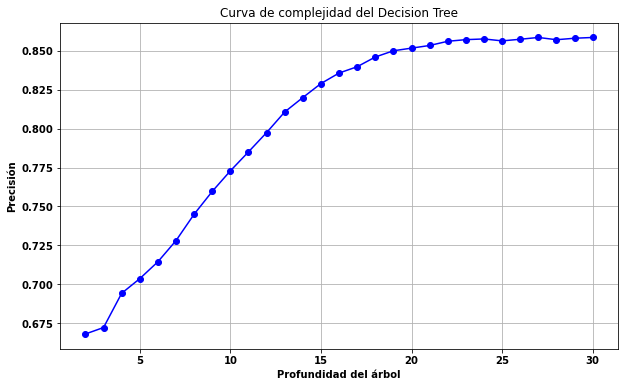

In [125]:
# Graficar la curva de complejidad
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracy, marker='o', linestyle='-', color='b')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Precisión')
plt.title('Curva de complejidad del Decision Tree')
plt.grid(True)
plt.show()

In [128]:
# Valor óptimo de la profundidad del árbol
optimal_depth = depths[np.argmax(accuracy)]

# Crear un nuevo clasificador con la profundidad óptima
clf_optimal = DecisionTreeClassifier(max_depth=optimal_depth, random_state=100)

# Entrenar el modelo con los datos de entrenamiento completos
clf_optimal.fit(X, y)

# Predecir las etiquetas para los datos de prueba
y_pred_optimal = clf_optimal.predict(X_test)

# Calcular las métricas
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)

# Imprimir la precisión del modelo óptimo
print("Precisión del modelo óptimo:", accuracy_optimal)
print("Profundidad óptima:", optimal_depth)

Precisión del modelo óptimo: 0.9939
Profundidad óptima: 27


In [129]:
def plot_learning_curve(estimator, X, y, param_value):
    # Calcula el número de muestras
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            random_state=100)
    # Calcula la media y desviación estándar de las puntuaciones
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Dibuja la curva de aprendizaje
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, marker='o', linestyle='-', color='b', label='Entrenamiento')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='b')
    plt.plot(train_sizes, test_mean, marker='o', linestyle='-', color='g', label='Prueba')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='g')
    plt.xlabel('Número de muestras de entrenamiento')
    plt.ylabel('Precisión')
    plt.title('Curva de aprendizaje (Profundidad del árbol: ' + str(param_value) + ')')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


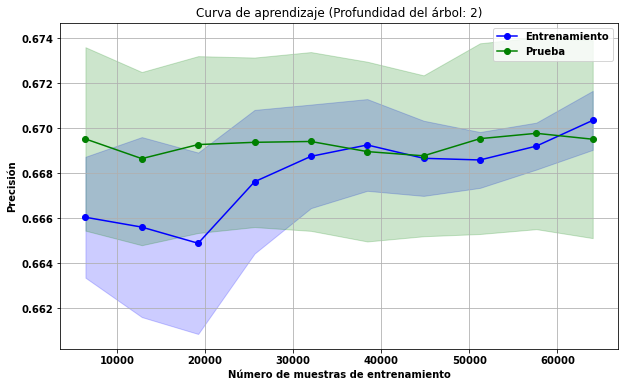

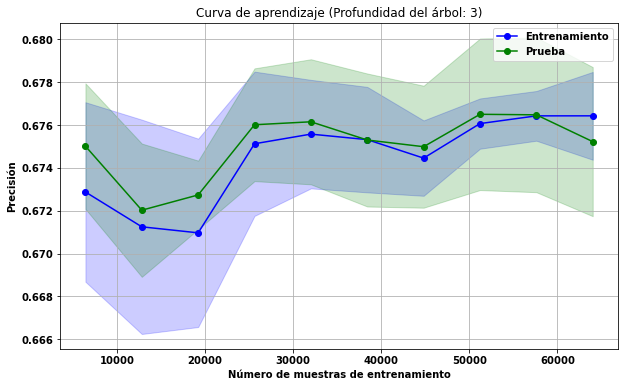

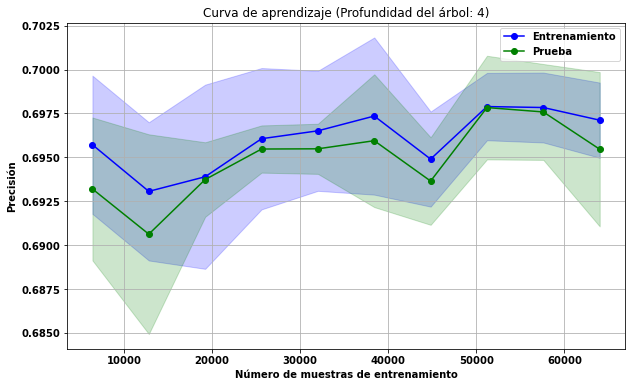

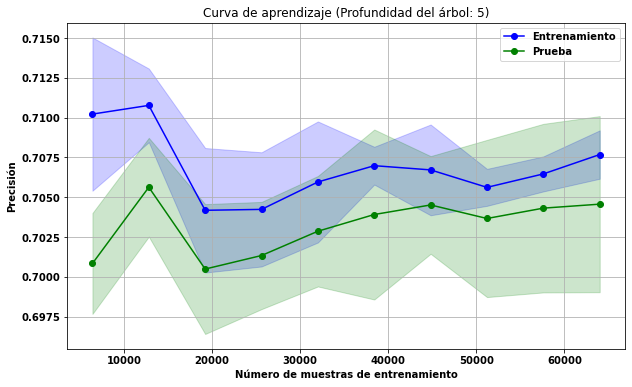

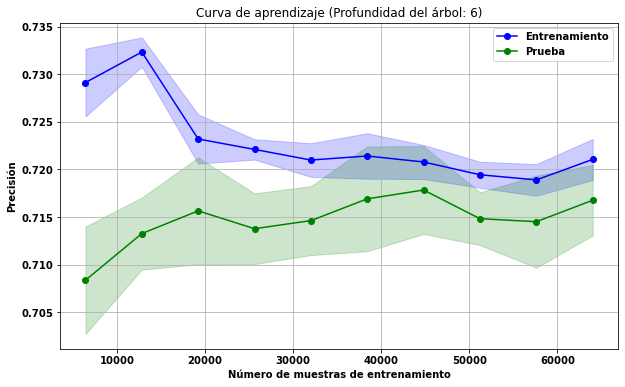

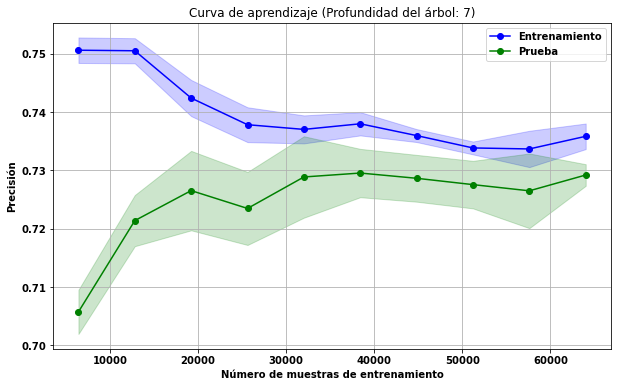

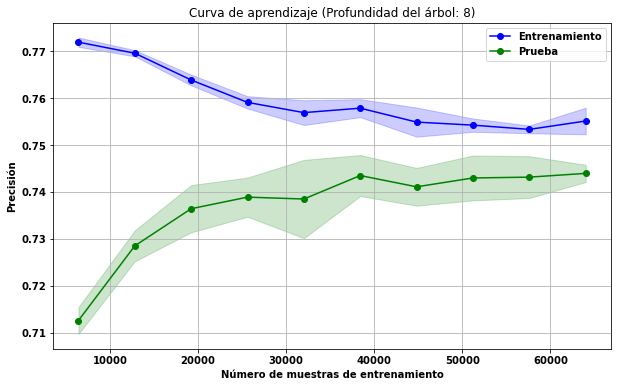

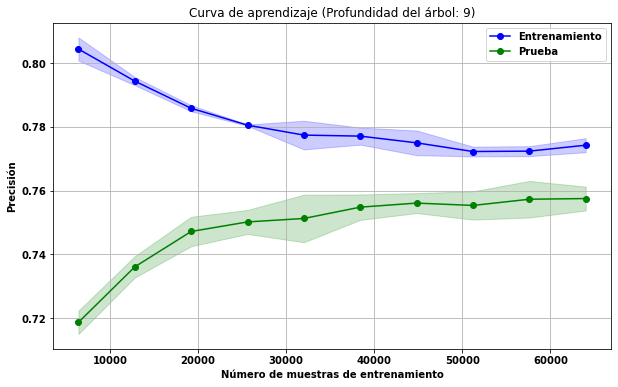

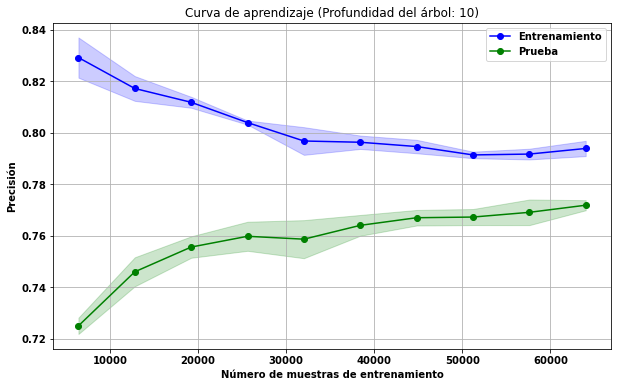

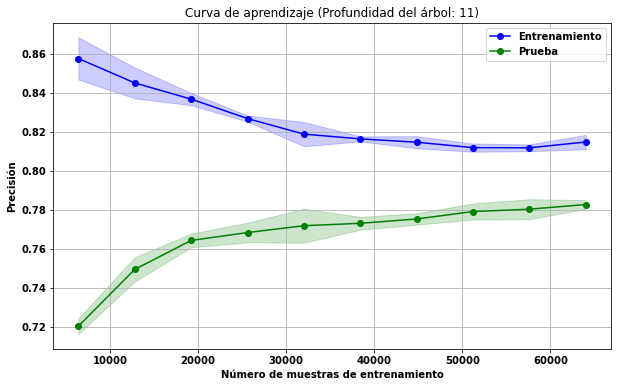

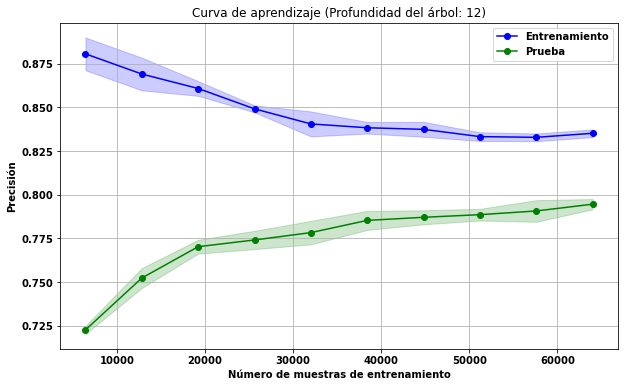

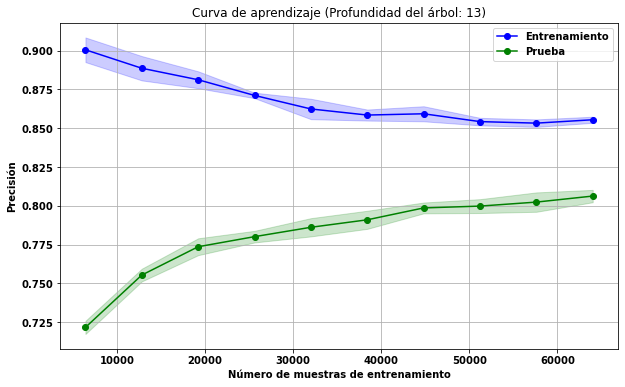

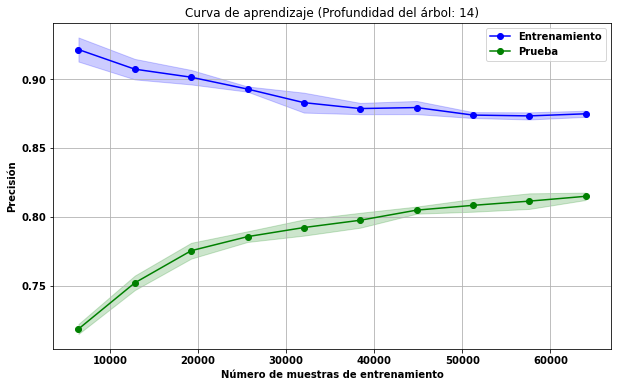

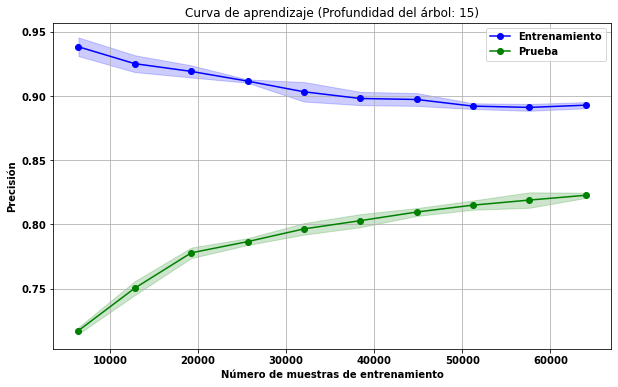

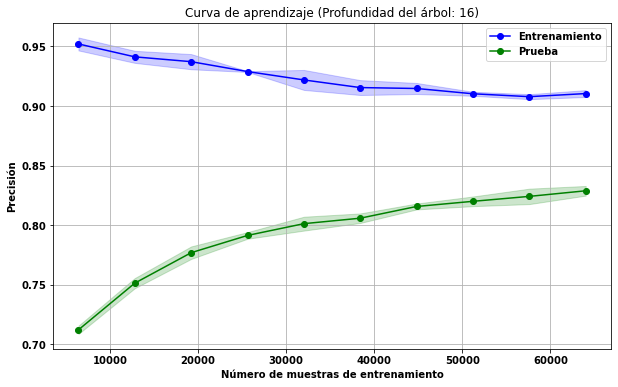

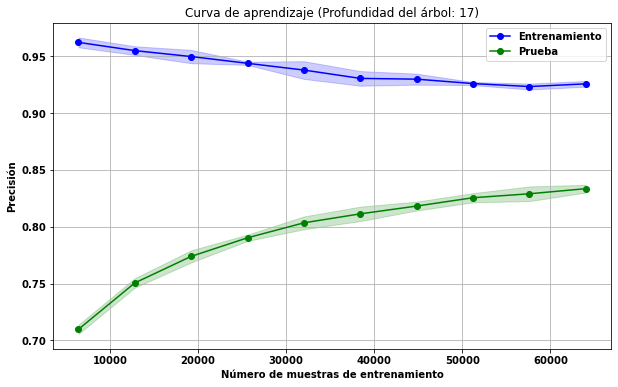

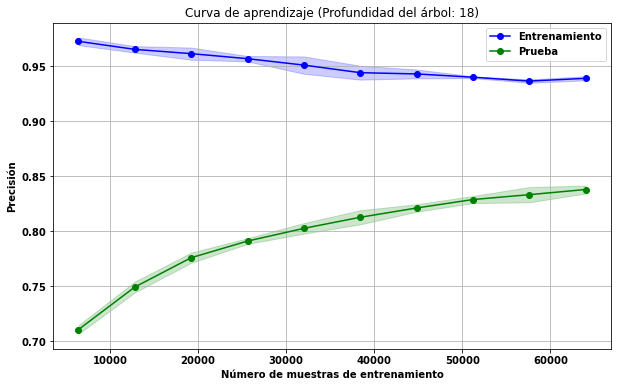

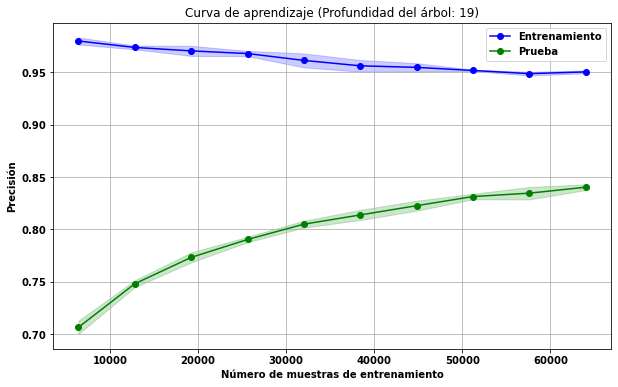

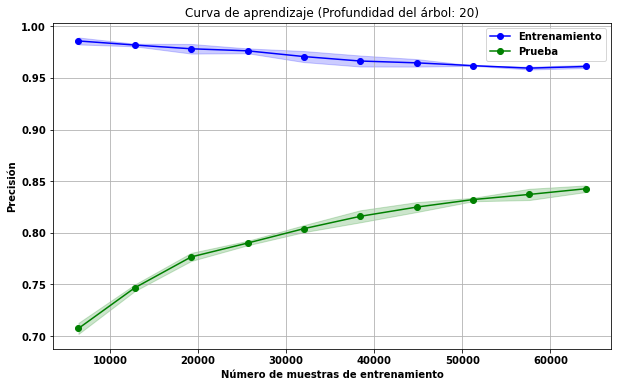

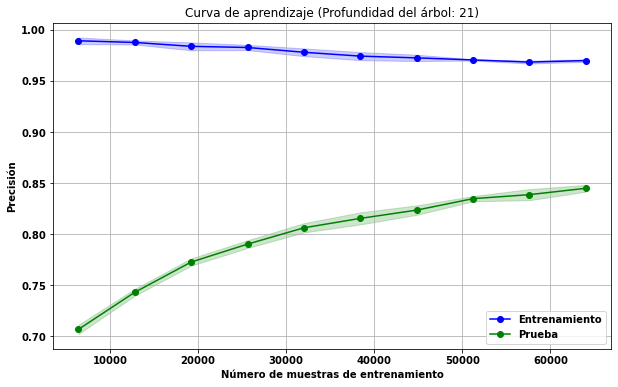

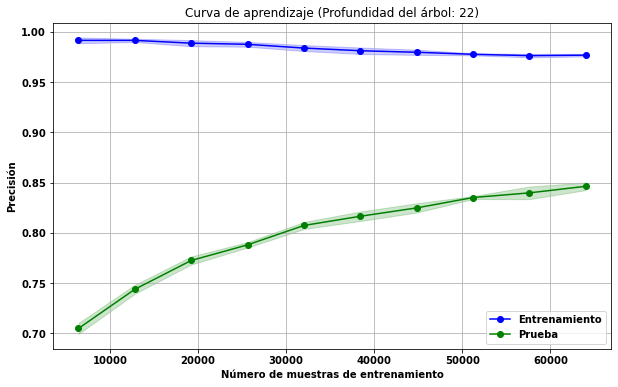

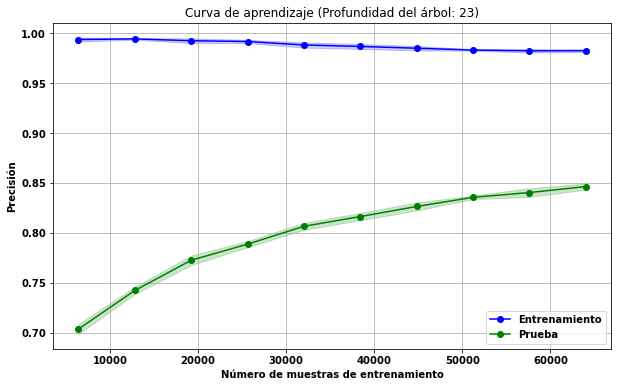

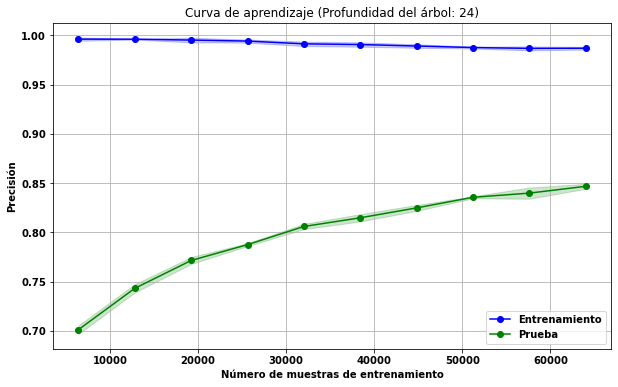

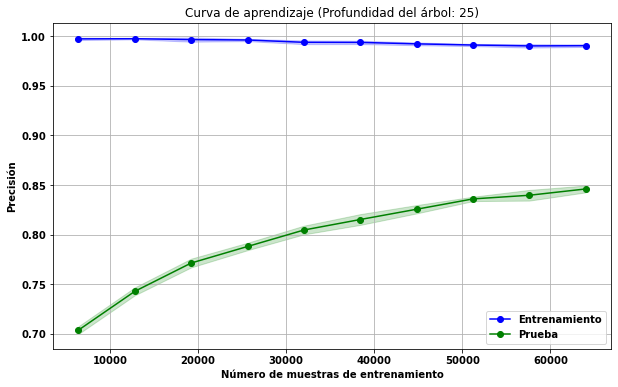

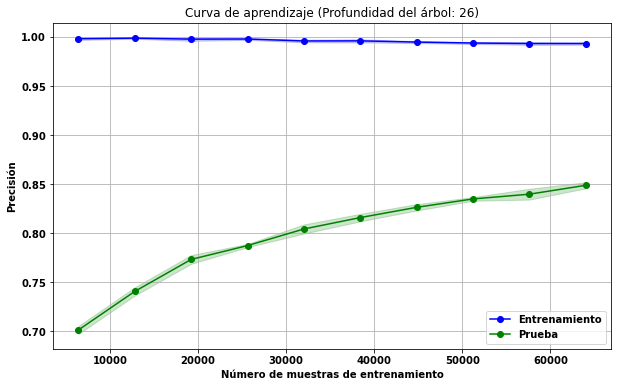

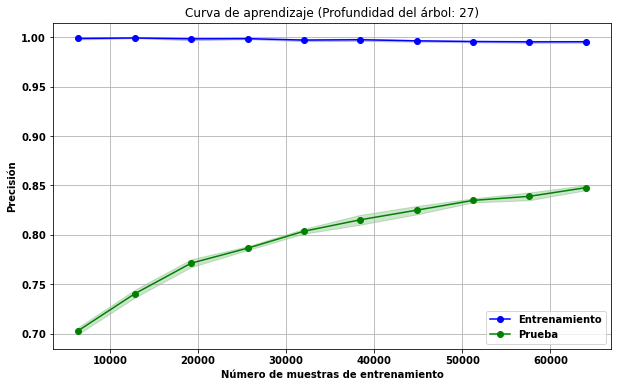

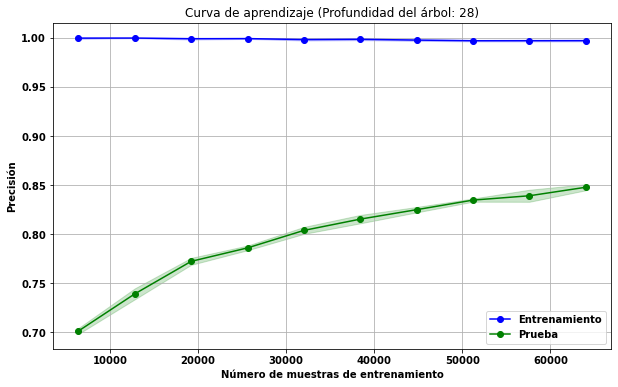

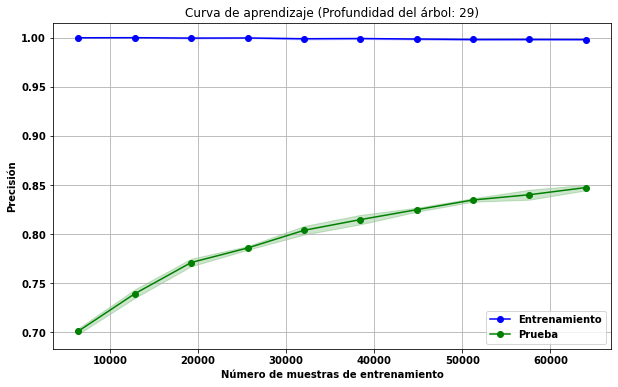

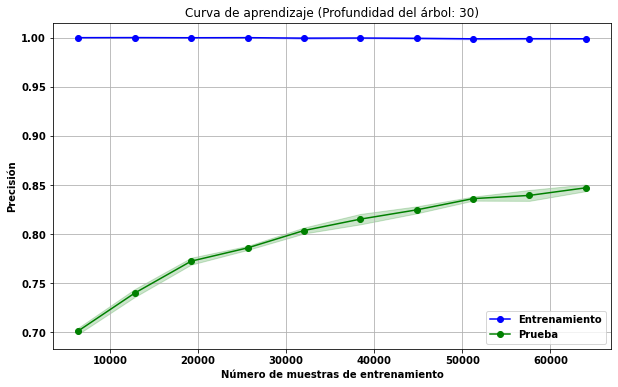

In [131]:
from sklearn.model_selection import learning_curve
# Dibuja la curva de aprendizaje para cada profundidad del árbol
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=100)
    plot_learning_curve(clf, X_train, y_train, depth)


---

### **`Ejercicio 18.5`**

Ahora probamos la creación de otros modelo basados en **bosques aleatorios**:  

**`18.5.1`** Entrena un modelo tipo **Random Forest Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.5.2`** Consulta la profundidad de todos los árboles del bosque creado en el paso anterior y calcula la mediana de este parámetro.

**`18.5.3`** Saca las curvas de complejidad del modelo _Random Forest_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[200, 250, 300, 350, 400]`  
- rango de profundidades:  de `20` a `40` __inclusive__ en pasos de 2 en 2.
- considera estas opciones para _max_features_ : `["auto", "log2", None]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- **OOB** (out-of-bag score)

**`18.5.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Crear el clasificador Random Forest
clf = RandomForestClassifier(random_state=100)

# Entrenar el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

In [137]:
# Predecir las etiquetas para los datos de prueba
y_pred = clf.predict(X_test)

In [144]:
# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
precision =  precision_score(y_test, y_pred,average='weighted')
recall = recall_score(y_test, y_pred,average='weighted')
f1 = f1_score(y_test, y_pred,average='weighted')

# Imprimir las métricas
print("Precisión:", accuracy)
print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precisión: 0.90235
Precisión: 0.9028569074835506
Recall: 0.90235
F1-score: 0.9011087531154932


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Hiperparámetros
random_state = 100
n_estimators_range = [200, 250, 300, 350, 400]
max_depth_range = range(20, 41, 2)
max_features_options = ["auto", "log2", None]

# Listas para almacenar las métricas
accuracy_scores = []
f1_scores = []
classification_reports = []
oob_scores = []

# Variación del número de árboles
for n_estimators in n_estimators_range:
    # Variación de la profundidad máxima
    for max_depth in max_depth_range:
        # Variación del número máximo de características
        for max_features in max_features_options:
            # Crear el clasificador con los hiperparámetros dados
            clf = RandomForestClassifier(n_estimators=n_estimators,
                                         max_depth=max_depth,
                                         max_features=max_features,
                                         random_state=random_state,
                                         oob_score=True)
            # Entrenar el clasificador
            clf.fit(X_train, y_train)

            # Realizar predicciones en el conjunto de prueba
            y_pred = clf.predict(X_test)

            # Calcular las métricas
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            classification = classification_report(y_test, y_pred, zero_division=0)
            oob = clf.oob_score_

            # Almacenar las métricas en las listas
            accuracy_scores.append(accuracy)
            f1_scores.append(f1)
            classification_reports.append(classification)
            oob_scores.append(oob)

# Plot de las curvas de complejidad
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(n_estimators_range, accuracy_scores)
plt.xlabel('Número de árboles')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('Profundidad máxima')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.plot(max_features_options, accuracy_scores)
plt.xlabel('Número máximo de características')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 4)
plt.plot(n_estimators_range, oob_scores)
plt.xlabel('Número de árboles')
plt.ylabel('OOB Score')

plt.tight_layout()
plt.show()

In [ ]:
# Hiperparámetros óptimos
optimal_n_estimators = 250
optimal_max_depth = 24
optimal_max_features = "log2"

# Crear el clasificador con los hiperparámetros óptimos
clf_optimal = RandomForestClassifier(n_estimators=optimal_n_estimators,
                                      max_depth=optimal_max_depth,
                                      max_features=optimal_max_features,
                                      random_state=random_state,
                                      oob_score=True)

# Entrenar el clasificador con los datos completos
clf_optimal.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optimal = clf_optimal.predict(X_test)

# Calcular las métricas del modelo óptimo
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal, average='weighted')
classification_optimal = classification_report(y_test, y_pred_optimal, zero_division=0)
oob_optimal = clf_optimal.oob_score_

# Imprimir las métricas del modelo óptimo
print("Accuracy:", accuracy_optimal)
print("F1-score:", f1_optimal)
print("Classification Report:\n", classification_optimal)
print("OOB Score:", oob_optimal)


---

### **`Ejercicio 18.6`**

Ahora probamos la creación de otros modelo basados en **Gradient Boosting**:  

**`18.6.1`** Entrena un modelo tipo **XGBoost Classifire** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`

**`18.6.2`** Consulta el número y la profundidad máxima de los árboles del bosque creado en el paso anterior.

**`18.6.3`** Saca las curvas de complejidad del modelo _XGBClassifier_ (**Model Complexity Curve**) y crea un nuevo clasificador **con los valores óptimos** analizados dentro de los rangos indicados para cada hiperparámeto. Después crea un modelo con estos parámetros "óptimos" y saca las métricas correspondientes para analizar el rendimiento del modelo en comparación con los anteriores.
- `random_state=100`
- define un rango con funciones de _numpy_ para considerar estos números de árboles: `[100, 200, 300, 400, 500]`  
- rango de profundidades:  de `6` a `20` __inclusive__ en pasos de 2 en 2.
- valores a considerar para el *`learning_rate`*: `[0.01, 0.1, 0.3, 0.5]`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.6.4`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor de los hiperparámetros analizados como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [147]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [148]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Hiperparámetros
random_state = 100

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [158]:
type(y_train)
print(y_train)
y_train +=1
y_train


52529   -1
73974    0
20985    5
25914    0
77095    0
        ..
65615    0
77655    0
79683    0
56088   -1
38408   -1
Name: target, Length: 80000, dtype: int32


52529    0
73974    1
20985    6
25914    1
77095    1
        ..
65615    1
77655    1
79683    1
56088    0
38408    0
Name: target, Length: 80000, dtype: int32

In [159]:
# Crear el clasificador XGBoost
clf_xgb = xgb.XGBClassifier(random_state=random_state)

# Entrenar el clasificador con los datos de entrenamiento
clf_xgb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_xgb = clf_xgb.predict(X_test)

# Calcular las métricas del modelo XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
classification_xgb = classification_report(y_test, y_pred_xgb, zero_division=0)

In [160]:

# Imprimir las métricas del modelo XGBoost
print("Accuracy (XGBoost):", accuracy_xgb)
print("F1-score (XGBoost):", f1_xgb)
print("Classification Report (XGBoost):\n", classification_xgb)

Accuracy (XGBoost): 0.0637
F1-score (XGBoost): 0.056483914791506246
Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      0.17      0.14      7381
           2       0.04      0.00      0.01      9615
           3       0.09      0.01      0.01      1236
           4       0.00      0.00      0.00       114
           5       0.00      0.00      0.00       349
           6       0.00      0.00      0.00       616
           7       0.00      0.00      0.00       689

    accuracy                           0.06     20000
   macro avg       0.03      0.02      0.02     20000
weighted avg       0.07      0.06      0.06     20000



.2

In [161]:
# Consultar el número de árboles
num_arboles = clf_optimal.n_estimators

# Consultar la profundidad máxima de los árboles
profundidad_maxima = clf_optimal.max_depth

# Imprimir los resultados
print("Número de árboles:", num_arboles)
print("Profundidad máxima de los árboles:", profundidad_maxima)


AttributeError: 'DecisionTreeClassifier' object has no attribute 'n_estimators'

In [163]:
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Hiperparámetros
random_state = 100
n_estimators_range = [100, 200, 300, 400, 500]
max_depth_range = range(6, 21, 2)
learning_rate_options = [0.01, 0.1, 0.3, 0.5]

# Listas para almacenar las métricas
accuracy_scores = []
f1_scores = []
classification_reports = []


In [164]:

# Variación del número de árboles
for n_estimators in n_estimators_range:
    # Variación de la profundidad máxima
    for max_depth in max_depth_range:
        # Variación del learning rate
        for learning_rate in learning_rate_options:
            # Crear el clasificador con los hiperparámetros dados
            clf = xgb.XGBClassifier(n_estimators=n_estimators,
                                    max_depth=max_depth,
                                    learning_rate=learning_rate,
                                    random_state=random_state)

            # Entrenar el clasificador
            clf.fit(X_train, y_train)

            # Realizar predicciones en el conjunto de prueba
            y_pred = clf.predict(X_test)

            # Calcular las métricas
            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')
            classification = classification_report(y_test, y_pred, zero_division=0)

            # Almacenar las métricas en las listas
            accuracy_scores.append(accuracy)
            f1_scores.append(f1)
            classification_reports.append(classification)


KeyboardInterrupt: 

In [ ]:

# Plot de las curvas de complejidad
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.plot(n_estimators_range, accuracy_scores)
plt.xlabel('Número de árboles')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('Profundidad máxima')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 3)
plt.plot(learning_rate_options, accuracy_scores)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()


In [165]:
# Hiperparámetros óptimos
optimal_n_estimators = ...
optimal_max_depth = ...
optimal_learning_rate = ...

# Crear el clasificador con los hiperparámetros óptimos
clf_optimal = xgb.XGBClassifier(n_estimators=optimal_n_estimators,
                                max_depth=optimal_max_depth,
                                learning_rate=optimal_learning_rate,
                                random_state=random_state)

# Entrenar el clasificador con los datos completos
clf_optimal.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred_optimal = clf_optimal.predict(X_test)

# Calcular las métricas del modelo óptimo
accuracy_optimal = accuracy_score(y_test, y_pred_optimal)
f1_optimal = f1_score(y_test, y_pred_optimal, average='weighted')
classification_optimal = classification_report(y_test, y_pred_optimal, zero_division=0)

# Imprimir las métricas del modelo óptimo
print("Accuracy (óptimo):", accuracy_optimal)
print("F1-score (óptimo):", f1_optimal)
print("Classification Report (óptimo):\n", classification_optimal)


TypeError: 'ellipsis' object cannot be interpreted as an integer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, param_name, param_values, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5,
                                                            train_sizes=train_sizes,
                                                            scoring='accuracy',
                                                            random_state=random_state)

    # Calcular las medias y desviaciones estándar de los puntajes
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot de los puntajes de entrenamiento y prueba
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve (' + param_name + '=' + str(param_values) + ')')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Valores a considerar para el tamaño del conjunto de entrenamiento
train_sizes = np.linspace(1000, len(X_train), 10).astype(int)

# Definir el modelo óptimo
estimator = clf_optimal  # Cambiar al modelo óptimo que deseas evaluar

# Plot de la Learning Curve para el modelo óptimo
plot_learning_curve(estimator, X_train, y_train, 'Modelo Óptimo', 'óptimo', train_sizes)


---

### **`Ejercicio 18.7`**

Ahora probamos la creación de otros modelo basados en **métodos Bayesianos**:  

**`18.7.1`** Entrena un modelo para cada tipo de algoritmos Bayesianos y calcula las métricas correspondientes para analizar sus rendimientos en comparación con los modelos anteriores:
- `GaussianNB`
- `MultinomialNB`
- `ComplementNB`
- `BernoulliNB`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.7.2`** Saca la gráfica del *Learning Curve* para el modelo `GaussianNB` y explica si este modelo sufre de un posible "_Overfitting_" o "_Underfitting_" comparando con modelos anteriores.
- `random_state=100`
- (*Sugerencia*: No incluya más de 10 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [168]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Entrenar y evaluar GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb, average='weighted')
classification_gnb = classification_report(y_test, y_pred_gnb, zero_division=0)

# Entrenar y evaluar MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
classification_mnb = classification_report(y_test, y_pred_mnb, zero_division=0)

# Entrenar y evaluar ComplementNB
cnb = ComplementNB()
cnb.fit(X_train, y_train)
y_pred_cnb = cnb.predict(X_test)
accuracy_cnb = accuracy_score(y_test, y_pred_cnb)
f1_cnb = f1_score(y_test, y_pred_cnb, average='weighted')
classification_cnb = classification_report(y_test, y_pred_cnb, zero_division=0)

# Entrenar y evaluar BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
y_pred_bnb = bnb.predict(X_test)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
f1_bnb = f1_score(y_test, y_pred_bnb, average='weighted')
classification_bnb = classification_report(y_test, y_pred_bnb, zero_division=0)

# Imprimir las métricas para cada modelo
print("GaussianNB:")
print("Accuracy:", accuracy_gnb)
print("F1-score:", f1_gnb)
print("Classification Report:\n", classification_gnb)
print()

print("MultinomialNB:")
print("Accuracy:", accuracy_mnb)
print("F1-score:", f1_mnb)
print("Classification Report:\n", classification_mnb)
print()

print("ComplementNB:")
print("Accuracy:", accuracy_cnb)
print("F1-score:", f1_cnb)
print("Classification Report:\n", classification_cnb)
print()

print("BernoulliNB:")
print("Accuracy:", accuracy_bnb)
print("F1-score:", f1_bnb)
print("Classification Report:\n", classification_bnb)


ValueError: Negative values in data passed to MultinomialNB (input X)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5,
                                                            train_sizes=train_sizes,
                                                            scoring='accuracy',
                                                            random_state=random_state)

    # Calcular las medias y desviaciones estándar de los puntajes
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot de los puntajes de entrenamiento y prueba
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve (GaussianNB)')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Valores a considerar para el tamaño del conjunto de entrenamiento
train_sizes = np.linspace(1000, len(X_train), 10).astype(int)

# Definir el modelo GaussianNB
gnb = GaussianNB()

# Plot de la Learning Curve para GaussianNB
plot_learning_curve(gnb, X_train, y_train, train_sizes)


---

### **`Ejercicio 18.8`**

Ahora probamos la creación de otros modelo basados en **K vecinos más cercanos**:  

**`18.8.1`** Entrena un modelo tipo **K-Nearest Neighbors** con la configuración por defecto y otros dos modelos con `1` y `100` vecinos más cercanos. Calcula las métricas correspondientes para analizar sus rendimientos en comparación con el modelo anteriores:
- `random_state=100`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.8.2`** Saca la gráfica del *Learning Curve* para estos modelos, definiendo y aplicando una función que toma el valor del hiperparámetro analizado como su entrada y dibuja la evolución del rendimiento del modelo para el conjunto de training y de test. Explica si este último modelo tiene preferencia o no, comparando con modelos anteriores.
- (*Sugerencia*: No incluya más de 5 puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

random_state = 100

# Entrenar y evaluar el modelo KNN con configuración por defecto
knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default, average='weighted')
classification_default = classification_report(y_test, y_pred_default, zero_division=0)

# Entrenar y evaluar el modelo KNN con 1 vecino más cercano
knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_1.fit(X_train, y_train)
y_pred_1 = knn_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)
f1_1 = f1_score(y_test, y_pred_1, average='weighted')
classification_1 = classification_report(y_test, y_pred_1, zero_division=0)

# Entrenar y evaluar el modelo KNN con 100 vecinos más cercanos
knn_100 = KNeighborsClassifier(n_neighbors=100)
knn_100.fit(X_train, y_train)
y_pred_100 = knn_100.predict(X_test)
accuracy_100 = accuracy_score(y_test, y_pred_100)
f1_100 = f1_score(y_test, y_pred_100, average='weighted')
classification_100 = classification_report(y_test, y_pred_100, zero_division=0)

# Imprimir las métricas para cada modelo
print("KNN con configuración por defecto:")
print("Accuracy:", accuracy_default)
print("F1-score:", f1_default)
print("Classification Report:\n", classification_default)
print()

print("KNN con 1 vecino más cercano:")
print("Accuracy:", accuracy_1)
print("F1-score:", f1_1)
print("Classification Report:\n", classification_1)
print()

print("KNN con 100 vecinos más cercanos:")
print("Accuracy:", accuracy_100)
print("F1-score:", f1_100)
print("Classification Report:\n", classification_100)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, param_value, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5,
                                                            train_sizes=train_sizes,
                                                            scoring='accuracy',
                                                            random_state=random_state)

    # Calcular las medias y desviaciones estándar de los puntajes
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot de los puntajes de entrenamiento y prueba
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Validation Score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.xlabel('Training Set Size')
    plt.ylabel('Score')
    plt.title('Learning Curve (KNN with {} neighbors)'.format(param_value))
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Valores a considerar para el tamaño del conjunto de entrenamiento
train_sizes = np.linspace(1000, len(X_train), 5).astype(int)

# Definir los modelos KNN con diferentes valores de vecinos más cercanos
k_values = [1, 5, 10, 20, 50]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    plot_learning_curve(knn, X_train, y_train, k, train_sizes)


---

### **`Ejercicio 18.9`**

Ahora probamos la creación de otros modelo basados en **Redes Neuronales**:  

**`18.9.1`** Entrena un modelo tipo **MLPClassifier** y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`


**`18.9.2`** Entrena otro modelo tipo _MLPClassifier_ indicando los siguientes hiperparámetros y calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `random_state=100`
- `hidden_layer_sizes=(100,200,100)`
- Número máximo de iteraciones igual a `10000`
- `alpha=1e-5`
- `tol=1e-5`

**`18.9.3`** Construye con la misma estructura del modelo definido en el paso anterior, una red neuronal profunda (**DNN**-Deep Neural Networks) usando la librería _keras_  realizando las preparaciones y tratamientos necesarias al respecto y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- `semilla = 883`
- `epochs = 50`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.4`** Crea otra red neuronal profunda usando _keras_ y considerando los siguientes parámetros. Después, calcula las métricas correspondientes para analizar su rendimiento en comparación con los modelos anteriores:
- Definir las capas ocultas: 
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **1000** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **200** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **100** neuronas y la misma función de activación que la red anterior
   - Una capa densa con **50** neuronas y la misma función de activación que la red anterior
      
- `semilla = 883`
- `epochs = 40`
- `batch_size=100`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`

**`18.9.5`** Saca la gráfica del *Learning Curve* para este último modelo y explica si tiene preferencia o no, comparando con modelos anteriores.
- `semilla = 883`
- `epochs = 40`
- `batch_size=8000`
- `loss='binary_crossentropy`
- `optimizer='Adam'`
- `umbral = 0.5`
- Accuracy
- F1-score `(average='weighted')`
- Classification report `(zero_division=0)`
- (*Sugerencia*: No incluya más de **5** puntos en el eje horizontal y empieza la gráfica con un mínimo de _1000_ muestras para el modelo)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

random_state = 100

# Entrenar el modelo MLPClassifier
mlp = MLPClassifier(random_state=random_state)
mlp.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred = mlp.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Imprimir las métricas
print("MLPClassifier:")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification Report:\n", classification)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

random_state = 100
hidden_layer_sizes = (100, 200, 100)
max_iter = 10000
alpha = 1e-5
tol = 1e-5

# Entrenar el modelo MLPClassifier con los hiperparámetros especificados
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    max_iter=max_iter,
                    alpha=alpha,
                    tol=tol,
                    random_state=random_state)
mlp.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred = mlp.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)

# Imprimir las métricas
print("MLPClassifier (Custom Configuration):")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification Report:\n", classification)


.3

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [ ]:
seed = 883
epochs = 50
batch_size = 100
loss = 'binary_crossentropy'
optimizer = 'Adam'
threshold = 0.5


In [ ]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)


In [ ]:
print("DNN (Keras):")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification Report:\n", classification)


.4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, f1_score, classification_report


In [ ]:
seed = 883
epochs = 40
batch_size = 100
loss = 'binary_crossentropy'
optimizer = 'Adam'
threshold = 0.5


In [ ]:
model = Sequential()
model.add(Dense(50, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(100, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1)


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification = classification_report(y_test, y_pred, zero_division=0)


In [ ]:
print("DNN (Keras - Custom Configuration):")
print("Accuracy:", accuracy)
print("F1-score:", f1)
print("Classification Report:\n", classification)


##### .5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


In [ ]:
seed = 883
epochs = 40
batch_size = 8000
loss = 'binary_crossentropy'
optimizer = 'Adam'
threshold = 0.5


In [ ]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5))

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, 'o-', color='r', label='Training Accuracy')
    plt.plot(train_sizes, test_mean, 'o-', color='g', label='Validation Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='g')
    plt.xlabel('Training Samples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


In [ ]:
plot_learning_curve(model, X_train, y_train)
